In [1]:
from dotenv import dotenv_values
config = dotenv_values(".env") 

API_KEY = config.get('API_KEY')

params = {
    'api_key': API_KEY
}

#### Get Wiz Matches

In [2]:
region = 'americas'
game_name = 'FUR Wiz'
tag_line = 'CBLOL'

In [3]:
import requests as requests
from urllib.parse import urlencode

# Get PUUID
url_get_puuid = f"https://{region}.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{game_name}/{tag_line}"
response  = requests.get(url_get_puuid, params=urlencode(params))
puuid = response.json()['puuid']
#Get last match
api_url_matches = f"https://{region}.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids"
response = requests.get(api_url_matches, params=urlencode(params))
last_match_id = response.json()[0]
#Get match info
api_url_timeline = f"https://{region}.api.riotgames.com/lol/match/v5/matches/{last_match_id}/timeline"
response = requests.get(api_url_timeline, params=urlencode(params))

In [4]:
info = response.json()['info']
metadata = response.json()['metadata']
participants = response.json()['info']['participants']

In [5]:
info.keys()

dict_keys(['endOfGameResult', 'frameInterval', 'frames', 'gameId', 'participants'])

In [7]:
frames = info['frames']

#get participant id
for participant in participants:
    if participant['puuid'] == puuid:
        participant_id = participant['participantId']

list_of_event_keys = set()

#Get gold and position
object_of_analysis = {}
total_kils = 0
for i, frame in enumerate(frames):
    for event in frame['events']:
        list_of_event_keys.add(event['type'])
        if event['type'] == 'CHAMPION_KILL' and event['killerId'] == participant_id:
            total_kils += 1

    object_of_analysis[i]= {
        'position': frame['participantFrames'][str(participant_id)]['position'],
        'total_gold': frame['participantFrames'][str(participant_id)]['totalGold'],
        'total_kils': total_kils
        }
            


In [14]:
list_of_event_keys

{'BUILDING_KILL',
 'CHAMPION_KILL',
 'CHAMPION_SPECIAL_KILL',
 'ELITE_MONSTER_KILL',
 'GAME_END',
 'ITEM_DESTROYED',
 'ITEM_PURCHASED',
 'ITEM_SOLD',
 'ITEM_UNDO',
 'LEVEL_UP',
 'OBJECTIVE_BOUNTY_PRESTART',
 'PAUSE_END',
 'SKILL_LEVEL_UP',
 'TURRET_PLATE_DESTROYED',
 'WARD_KILL',
 'WARD_PLACED'}

#### First 5 steps

Text(0.5, 1.0, 'Wiz Analysis: Total Gold and Kills at the First 5 Saved Frames')

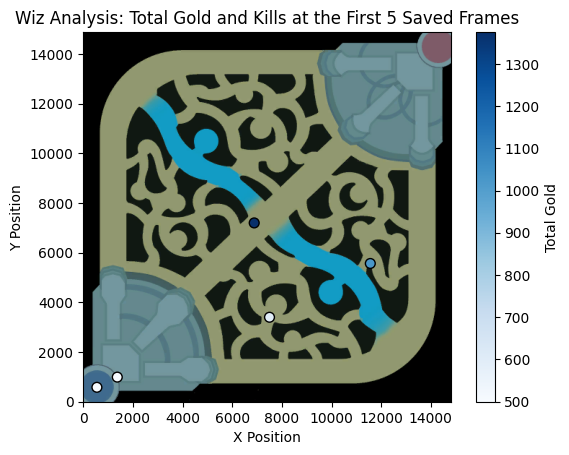

In [13]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Map bounds (https://hextechdocs.dev/map-data/):
#   min: {x: -120, y: -120}
#   max: {x: 14870, y: 14980}

img = plt.imread('map.png')
fig, ax = plt.subplots()
x = [object_of_analysis[key]['position']['x'] for key in object_of_analysis][:5]
y = [object_of_analysis[key]['position']['y'] for key in object_of_analysis][:5]
total_gold = [object_of_analysis[key]['total_gold'] for key in object_of_analysis][:5]
total_kils = [object_of_analysis[key]['total_kils'] for key in object_of_analysis][:5]

ax.imshow(img, extent=[0, 14820, 0, 14881])

scatter = ax.scatter(x, y, c=total_gold, cmap='Blues', edgecolors='black', s=[k*10+50 for k in total_kils])

cbar = plt.colorbar(scatter)
cbar.set_label('Total Gold')

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Wiz Analysis: Total Gold and Kills at the First 5 Saved Frames')

### All steps

Text(0.5, 1.0, 'Wiz Analysis: Total Gold and Kills')

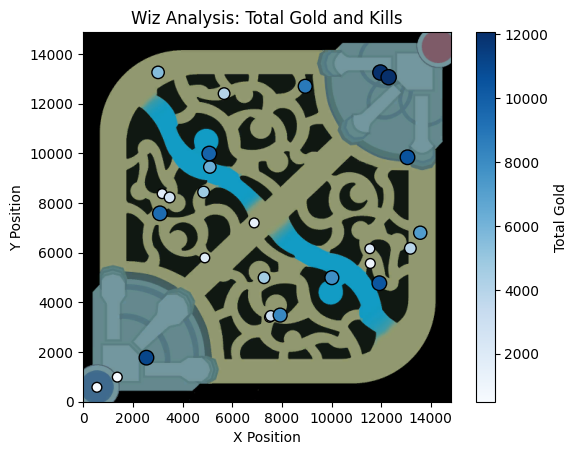

In [9]:
img = plt.imread('map.png')
fig, ax = plt.subplots()
x = [object_of_analysis[key]['position']['x'] for key in object_of_analysis]
y = [object_of_analysis[key]['position']['y'] for key in object_of_analysis]
total_gold = [object_of_analysis[key]['total_gold'] for key in object_of_analysis]
total_kils = [object_of_analysis[key]['total_kils'] for key in object_of_analysis]

ax.imshow(img, extent=[0, 14820, 0, 14881])

scatter = ax.scatter(x, y, c=total_gold, cmap='Blues', edgecolors='black', s=[k*10+50 for k in total_kils])

cbar = plt.colorbar(scatter)
cbar.set_label('Total Gold')

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Wiz Analysis: Total Gold and Kills')